In [2]:
import mlib
import random
import sys
import time
from matplotlib import pyplot as plt
import numpy as np
from numpy.linalg import inv

Basic operations

In [17]:
# note: most operations create a new marray object

# create marray from list
a = mlib.Marray([[1,2], [3,4]])
# info in an marray
print(f"marray: {a}, shape {a.shape}, ndim: {a.ndim}")

# reshape
b = a.reshape(1,2,1,2)
print(f"marray: {b}, shape {b.shape}, ndim: {b.ndim}")

# +, -, / **, ect
c = a + a * a
print(f"marray: {c}, shape {c.shape}, ndim: {c.ndim}")

# views of an marray, note that section_of_b and b share point to same data
section_of_b = b[0,1]
print(f"marray: {section_of_b}, shape {section_of_b.shape}, ndim: {section_of_b.ndim}")

# tranpose
a_tranpose = a.T
print(f"marray: {a_tranpose}, shape {a_tranpose.shape}, ndim: {a_tranpose.ndim}")

# inverse
inverse_a = a.inverse()
print(f"marray: {inverse_a}, shape {inverse_a.shape}, ndim: {inverse_a.ndim}")


marray: [[1.0, 2.0],[3.0, 4.0]], shape (2, 2), ndim: 2
marray: [[[[1.0, 2.0]],[[3.0, 4.0]]]], shape (1, 2, 1, 2), ndim: 4
marray: [[2.0, 6.0],[12.0, 20.0]], shape (2, 2), ndim: 2
marray: [[3.0, 4.0]], shape (1, 2), ndim: 2
marray: [[1.0, 3.0],[2.0, 4.0]], shape (2, 2), ndim: 2
marray: [[-1.9999999999999998, 1.0],[1.4999999999999998, -0.49999999999999994]], shape (2, 2), ndim: 2
inv_a @ a = [[1.0000000000000002, 4.440892098500626e-16],[-5.551115123125783e-17, 0.9999999999999998]]


speed & space of mlib vs vanilla python

In [52]:
def time_fn(func, func_name, inputs, num_tests):
    start = time.time()
    for _ in range(num_tests):
        func(*inputs)
    end = time.time()
    return (end - start) * 1000 / num_tests

In [70]:
add = lambda x, y: x + y

x_mlib, y_mlib = [], []
x_van, y_van = [], []
for n in range(1, 100000, 500):
    x_mlib.append(n / 1000)
    x_van.append(n / 1000)
    a = np.random.randn(n)
    b = np.random.randn(n)
    c = [1 for _ in range(n)]
    d = [1 for _ in range(n)]
    y_mlib.append(time_fn(add, "add", [a, b], 20))
    y_van.append(time_fn(add, "add", [c, d], 20))

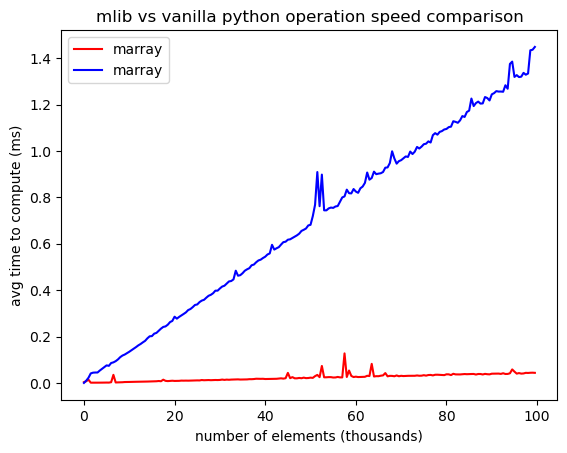

In [72]:
plt.plot(x_mlib, y_mlib, "-r", label="marray")
plt.plot(x_van, y_van, "-b", label="marray")
plt.xlabel("number of elements (thousands)")
plt.ylabel("avg time to compute (ms)")
plt.title("mlib vs vanilla python operation speed comparison")
plt.legend(loc="upper left")

plt.show()


Simple linear regression with fake data


In [126]:
# true functions to be predicted
f_true = lambda x: x * 2

# sample data with noise
x_train = np.random.uniform(0,5, 10).reshape(10,1)
y_train = x_train * 2 + np.random.randn(10,1)
 
# estimator
w_hat = (inv(x_train.T @ x_train) @ x_train.T @ y_train).item()
print(f"estimator: {w_hat}")

estimator: 2.2218705886678984


/var/folders/nn/xzzlts8n4cz51ztmk6jjhzr80000gn/T/ipykernel_31618/1500095040.py:4: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-b" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(line, w_hat * line, "-b", label="f_pred", linestyle='dashed')


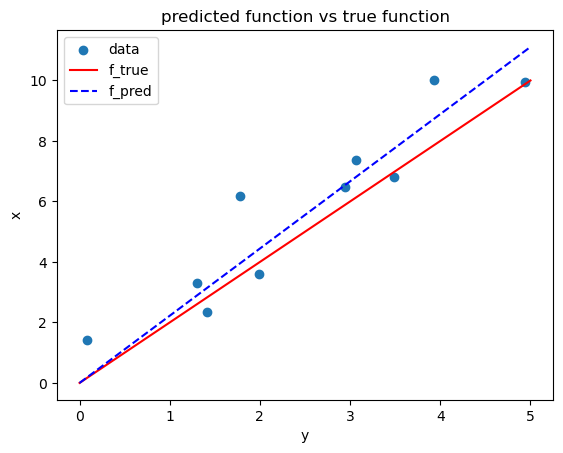

In [127]:
line = np.linspace(0,5, num=20)
plt.scatter(x_train, y_train, label="data")
plt.plot(line, f_true(line), "-r", label="f_true")
plt.plot(line, w_hat * line, "-b", label="f_pred", linestyle='dashed')
plt.xlabel("y")
plt.ylabel("x")
plt.title("predicted function vs true function")
plt.legend(loc="upper left")

plt.show()

Autograd